# TASK 3:EXPLORATORY DATA ANALYSIS - RETAIL


## Author: Satyata Dhargawe

### Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


#### **Importing data**

In [10]:
df = pd.read_csv ('C:\\Users\\Satyata Dhorgawe\\Desktop\\SampleSuperstore.csv')


In [11]:

df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [12]:
#Seeing the shape of our data
df.shape

(9994, 13)

In [13]:
#Getting a basic status of our datset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### **Inspecting the data**

In [14]:
#we display basic info about the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [15]:
# checking for duplicate data

df.duplicated().sum()

17

In [16]:
#Dropping the duplicate data
df.drop_duplicates(inplace= True)

In [17]:
#Checking the duplicated again
df.duplicated().sum()

0

In [18]:
# we will now drop the unnecessary columns which do not  affect the sales or profit

df.drop(columns="Postal Code", axis=1, inplace=True)
df.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [19]:
core1 = df.corr()
core1

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


<AxesSubplot:>

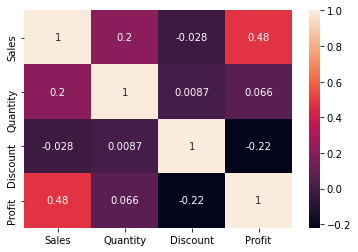

In [20]:
# We check the collinearity between sales, quantity, discount and profit

sns.heatmap(core1, annot=True)

### **Inference:**
   *Profits and sales are highly correlated to eachother whereas there is no correlation between quantity and profit* 
    

### **EXPLORATORY ANALYSIS**

In [21]:
sales_profit = df.groupby("State")["Profit"].sum()
sales_profit


State
Alabama                  5786.8253
Arizona                 -3427.9246
Arkansas                 4008.6871
California              76330.7891
Colorado                -6527.8579
Connecticut              3511.4918
Delaware                 9977.3748
District of Columbia     1059.5893
Florida                 -3399.3017
Georgia                 16250.0433
Idaho                     826.7231
Illinois               -12601.6500
Indiana                 18382.9363
Iowa                     1183.8119
Kansas                    836.4435
Kentucky                11199.6966
Louisiana                2196.1023
Maine                     454.4862
Maryland                 7031.1788
Massachusetts            6785.5016
Michigan                24428.0903
Minnesota               10823.1874
Mississippi              3172.9762
Missouri                 6436.2105
Montana                  1833.3285
Nebraska                 2037.0942
Nevada                   3316.7659
New Hampshire            1706.5028
New Jersey    

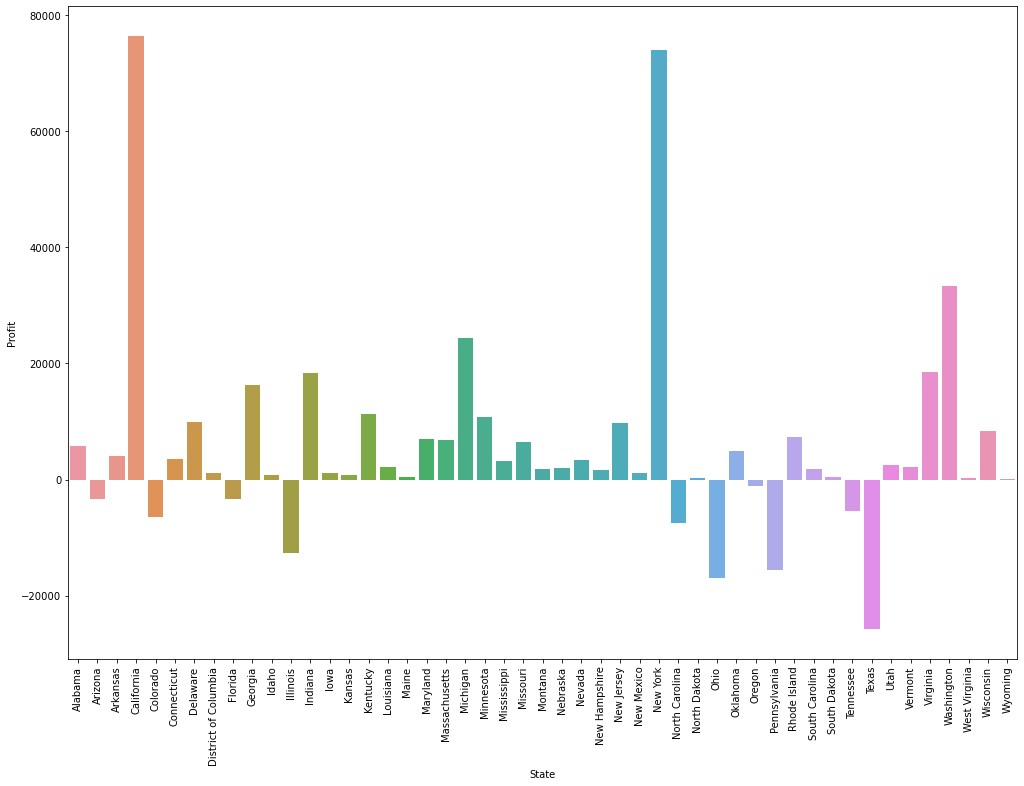

In [22]:
plt.figure(figsize = (17,12))
sns.barplot(x=sales_profit.index, y=sales_profit.values)
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.show()

### **Inference**:

1) *California makes the highest profit followed by New York and Washington* <br>
2) *We also see that Texas, Ohio and Pennsylvania are running in loss*


### **Region Vs Count** 

C:\Users\Satyata Dhorgawe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region', ylabel='count'>

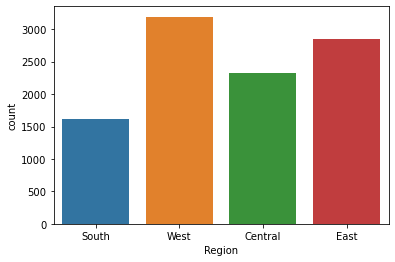

In [23]:
sns.countplot("Region", data=df)

### **Inference**
*We see that the West region is the highest contributor to sales and the south region is the lowest contributor*

### **Segment vs Count**

C:\Users\Satyata Dhorgawe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segment', ylabel='count'>

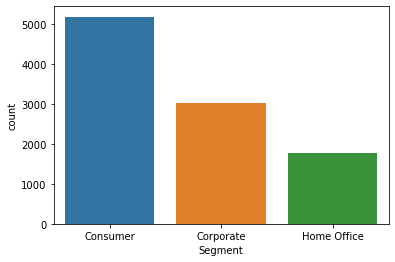

In [24]:
sns.countplot("Segment", data=df)

### **Inference**
*Consumers are the largest contributors to sales and Home Office products are the least*

### **SUB-CATEGORY VS REGION**

[]

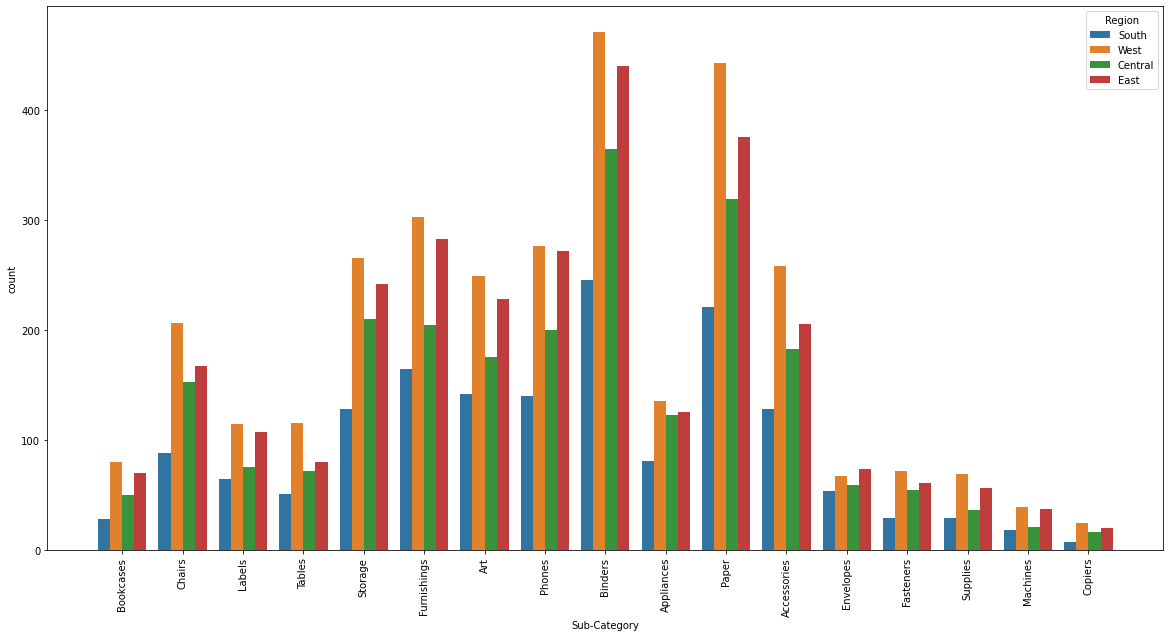

In [25]:

plt.figure(figsize=(20,10))
sns.countplot(x="Sub-Category", hue= "Region", data=df)
plt.xticks(rotation="vertical")
plt.plot()

### **Inference**
1) *Binders are the most widely sold products followed by Paper and Furnihings* <br>
2) *Copiers and Machines are the least sold products* <br>
3) *The west region always seems to lead in sales* 

### **SALES PER STATE**

<AxesSubplot:xlabel='State'>

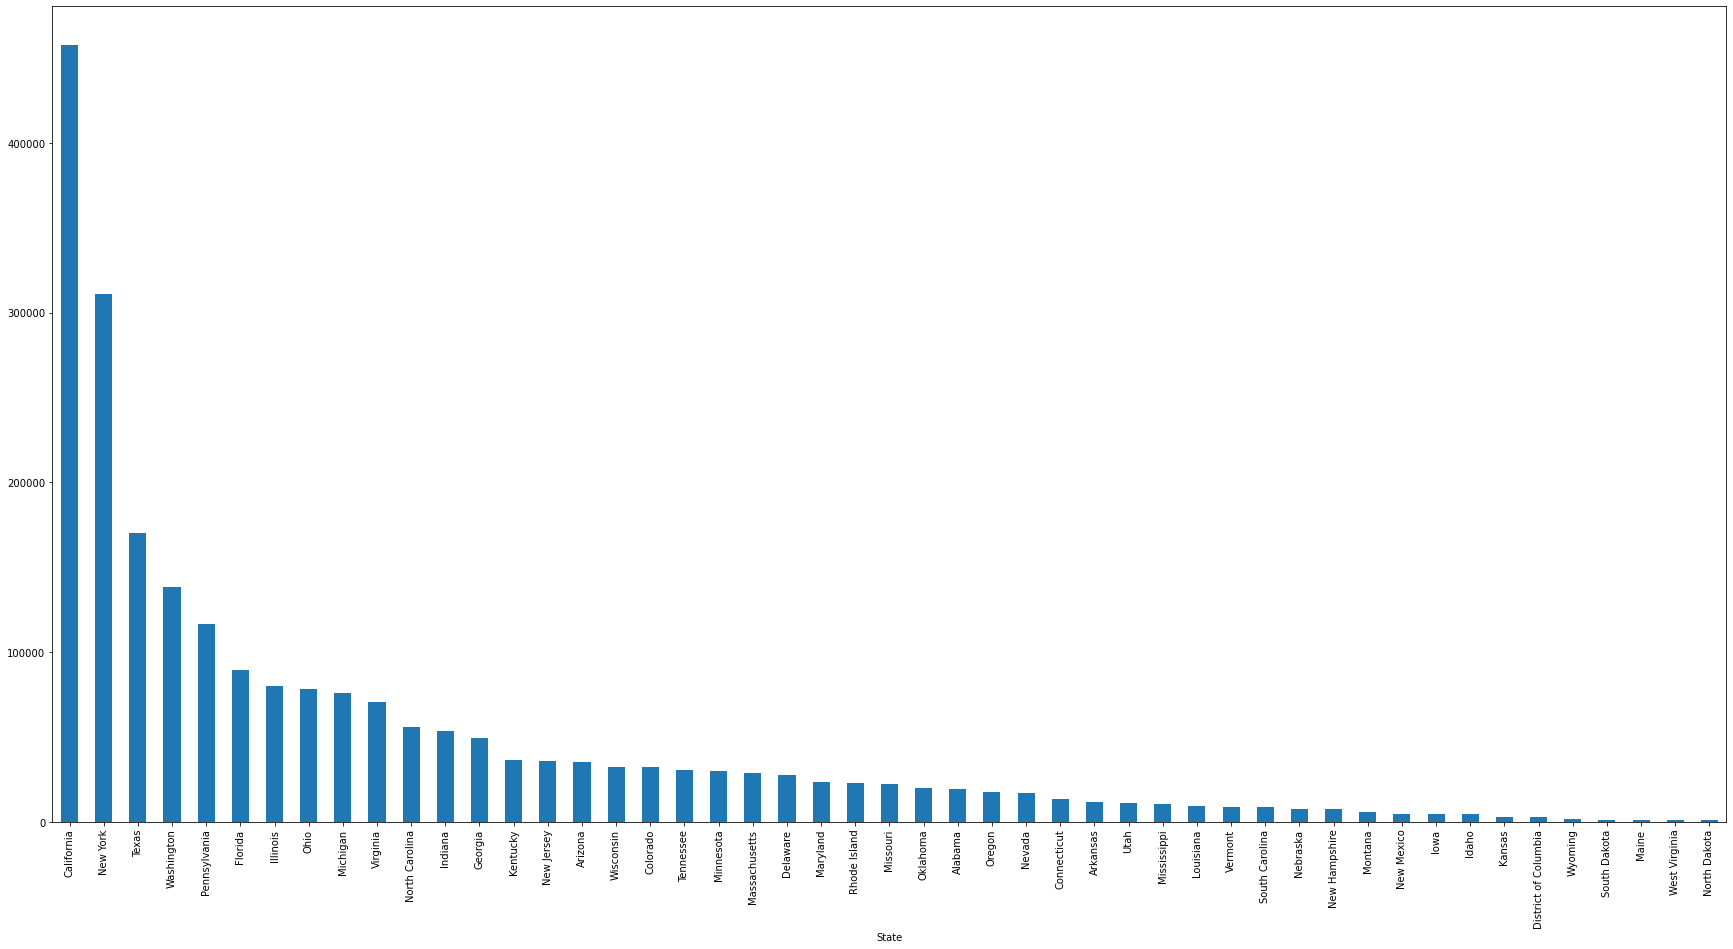

In [26]:
sales = df.groupby("State")["Sales"].sum().sort_values(ascending=False)
sales.plot.bar(figsize=(30,15))

### **Inference**
1) *In states like Columbia, South and North Dakota and West Verginia our sales is close to nil*

### **PROFIT FOR VARIOUS CATEGORIES**

<ipython-input-27-aa5a295f75cf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category = df.groupby("Sub-Category")["Profit", "Sales"].sum()


<AxesSubplot:xlabel='Sub-Category'>

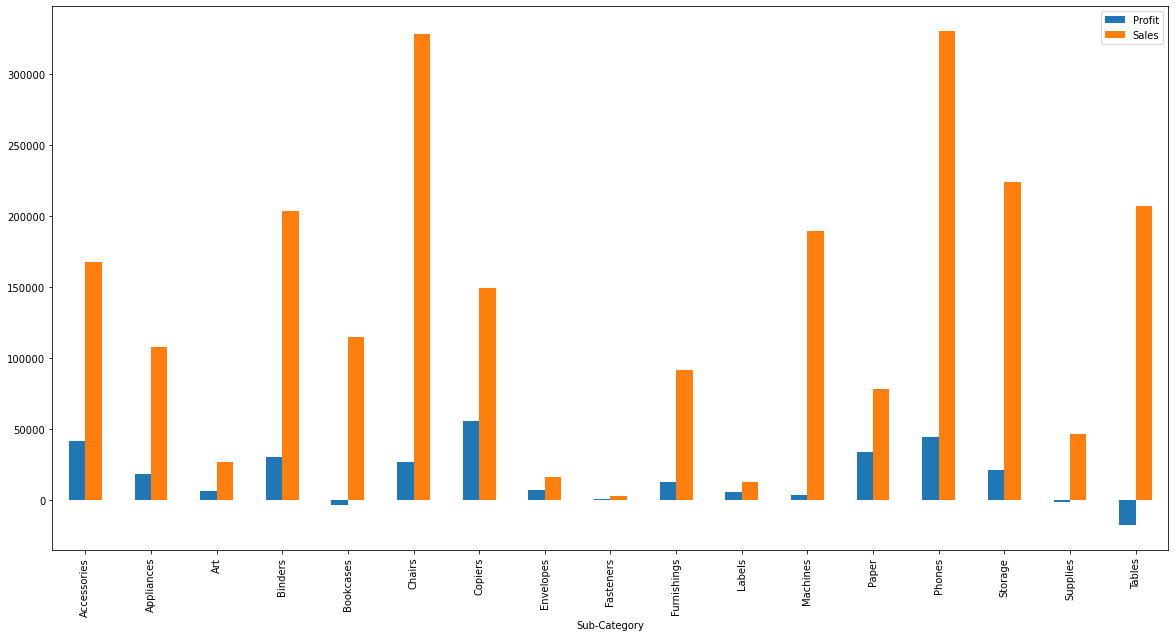

In [27]:

category = df.groupby("Sub-Category")["Profit", "Sales"].sum()
category.plot.bar(figsize=(20,10))

### **Inference**
1) *We observe that although our sales are very high the profit we are making is very low* <br>
2) *The best Sales vs Profit ratio we obtain is from copiers* <br>
3) *When it comes to tables , although our sales are very high but we are still at a loss , the same applies with book cases*

#### **CATEGORY VS THE REGIONS**

[]

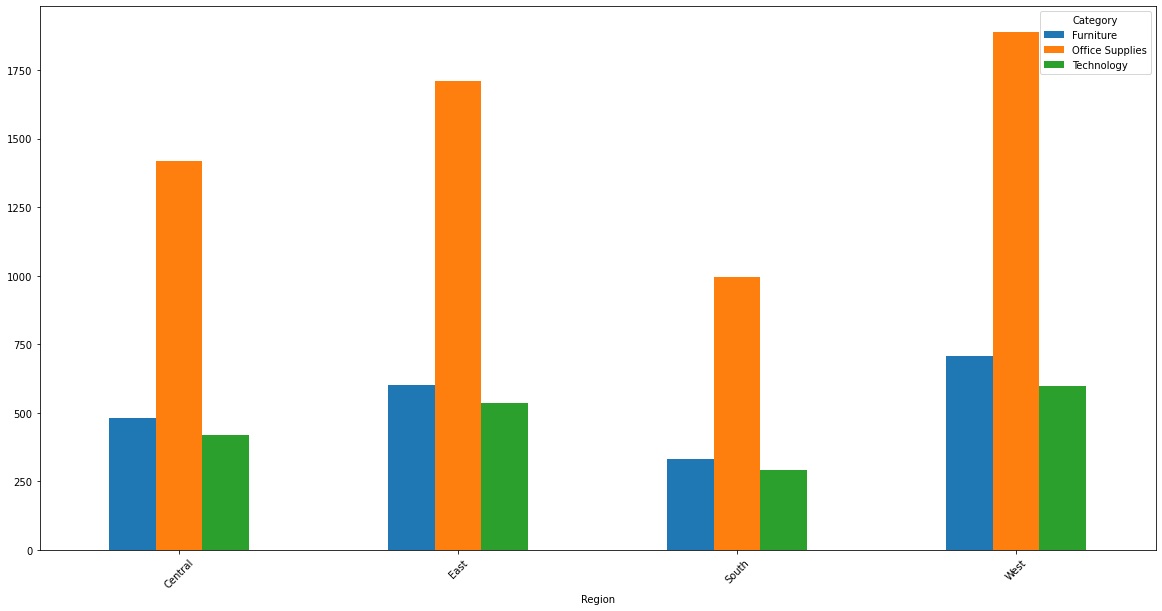

In [28]:
pd.crosstab(df["Region"], df["Category"]).plot(kind="bar", figsize=(20,10))
plt.xticks(rotation=45)
plt.plot()

### **Inference**
1) *Office Supplies Lead in every sales in all the regions* <br>
2) *The most sales occur in the west followed by east* <br>
3) *Sales are least in the South*

### **Conclusion**
#### *Weak Areas*: <br>
1) *Although Copiers are the least sold products , they make the most profit and hence we must look for ways to improve the sales of Copiers* <br>
2)*When it comes to selling tables , our sales is high but we are still facing loss , so we should stop selling tables at all till the rest of the sales isnt imporving* <br>
3) *We should try to look for ways to imporve our sales in North, South Dakota , West Virginia and Columbia* <br>
4)*Our sales at Ohio, Texas and Pennsylvania are running on loss* 
